<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#plot-your-sounding" data-toc-modified-id="plot-your-sounding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>plot your sounding</a></span><ul class="toc-item"><li><span><a href="#set-sounding_folder-to-the-name-of-your-downloaded-sounding-folder" data-toc-modified-id="set-sounding_folder-to-the-name-of-your-downloaded-sounding-folder-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>set sounding_folder to the name of your downloaded sounding folder</a></span></li></ul></li><li><span><a href="#For-Monday-9am" data-toc-modified-id="For-Monday-9am-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>For Monday 9am</a></span><ul class="toc-item"><li><span><a href="#Test-the-rootfinder" data-toc-modified-id="Test-the-rootfinder-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Test the rootfinder</a></span></li><li><span><a href="#get-the-dewpoint-for-10-g/kg-for-30-pressures" data-toc-modified-id="get-the-dewpoint-for-10-g/kg-for-30-pressures-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>get the dewpoint for 10 g/kg for 30 pressures</a></span></li><li><span><a href="#plot-on-a-skewT-curve" data-toc-modified-id="plot-on-a-skewT-curve-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot on a skewT curve</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#!conda install -y pytz

# plot your sounding


## set sounding_folder to the name of your downloaded sounding folder

In [2]:
from a405.soundings.wyominglib import read_soundings
from a405.skewT.skewlib import makeSkewDry
from a405.thermo.thermlib import convertTempToSkew
import datetime
import pytz

sounding_folder = 'soundingdir'
soundings= read_soundings(sounding_folder)
print(soundings.keys())
print(soundings['sounding_dict'].keys())

dict_keys(['filelist', 'attributes', 'input_args', 'file_dict', 'sounding_dict'])
dict_keys([(2017, 7, 1, 0), (2017, 7, 1, 12), (2017, 7, 2, 0), (2017, 7, 2, 12), (2017, 7, 3, 0), (2017, 7, 3, 12), (2017, 7, 4, 0), (2017, 7, 4, 12), (2017, 7, 5, 0), (2017, 7, 5, 12), (2017, 7, 6, 0), (2017, 7, 6, 12), (2017, 7, 7, 0), (2017, 7, 7, 12), (2017, 7, 8, 0), (2017, 7, 8, 12), (2017, 7, 9, 0), (2017, 7, 9, 12), (2017, 7, 10, 0), (2017, 7, 10, 12), (2017, 7, 11, 0), (2017, 7, 11, 12), (2017, 7, 12, 0), (2017, 7, 12, 12), (2017, 7, 13, 0), (2017, 7, 13, 12), (2017, 7, 14, 0), (2017, 7, 14, 12), (2017, 7, 15, 0), (2017, 7, 15, 12), (2017, 7, 16, 0), (2017, 7, 16, 12), (2017, 7, 17, 0), (2017, 7, 17, 12), (2017, 7, 18, 0)])


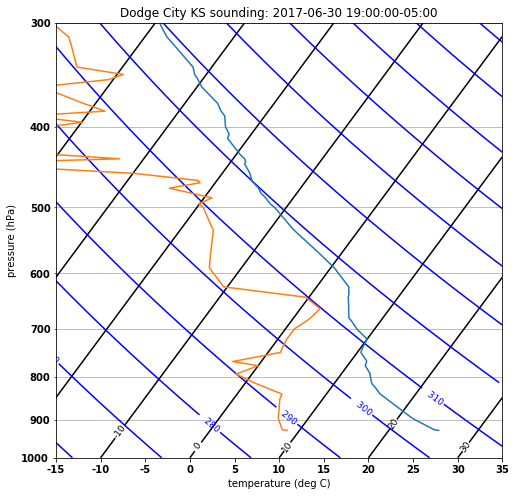

In [4]:
the_date=(2017,7,1,0)
the_sounding=soundings['sounding_dict'][the_date]
attributes=soundings['attributes']
#print(attributes)
fig,ax =plt.subplots(1,1,figsize=(8,8))
ax,skew = makeSkewDry(ax)
temp=the_sounding['temp']
press = the_sounding['pres']
tdew = the_sounding['dwpt']
temp_skew = convertTempToSkew(temp,press,skew)
tdew_skew = convertTempToSkew(tdew,press,skew)
ax.plot(temp_skew,press)
ax.plot(tdew_skew,press)
the_date=datetime.datetime(*the_date,tzinfo=pytz.utc)
central=pytz.timezone('US/Central')
the_date_central=the_date.astimezone(central)
title=f'Dodge City KS sounding: {str(the_date_central)}'
ax.set_title(title);
#help(convertTempToSkew)


# For Monday 9am

Check in a notebook that puts your sounding on the tephigram and draws a line of constant saturation mixing ratio 
$r_s$ = 10 g/kg between 1000 and  400 hPa.  

Hint -- you want to rootfind the temperature that satisfies Thompkins (2.20):

$$r_s = \frac{\epsilon e_s(T)}{p - e_s(T)} = 0.01\ kg/kg$$

for a range of pressures then convert the temperatures to skew coordinates.

Here is the top part of my rootfinding cell.  What's missing is

1) code that calls find_esat and calculates rsat for the guess temperature temp at pressure press and subtracts it from rsat to get the residual

2) code that passes that to the rootfinder to find the temperature such that rsat(temp,press) = rsat_target

3) code that does that for a range of pressures and converts the resulting temp,press line to skew coords and adds them to your sounding

Give it a couple of hours, and if you're stuck try to give as clear a bug report as you can on your partially completed notebook

from a405thermo.thermlib import find_esat

def zero_rs(temp,rsat_target,press):
    """
      find the saturation temperature for 
      a given rsat,press, by rootfinding this zero
      
      input: temp (guess) (K)
             rsat_target (kg/kg)
             press (hPa)
      output: residual
      
      see thompkins 2.20
     
    """

In [8]:
from a405.thermo.thermlib import find_esat
from a405.thermo.constants import constants as c

def zero_rs(temp,rsat,press):
    """
      find the saturation temperature for 
      a given rsat,press, by rootfinding this zero
      
      input: temp (guess) (K)
             rsat (kg/kg)
             press (hPa)
      output: residual
      
      see thompkins 2.20
     
    """
    esat=find_esat(temp)*0.01  #convert to hPa
    residual=rsat - c.eps*esat/(press - esat)
    return residual

def find_rsat(temp,press):
    """
       input: temp (K)
              press (hPa)
        output: rsat (kg/kg)
    """
    esat = find_esat(temp)*0.01
    rsat=c.eps*esat/(press - esat)
    return rsat

def zero_find_rs(tstart,rsat,press):
    """
       find the temp that produces rsat at press.
       input: temp (K)
              rsat (kg/kg)
              press (hPa)
        output: temp (K)
    """
    brackets=rf.find_interval(zero_rs,tstart,rsat,press)
    temp = rf.fzero(zero_rs,brackets,rsat,press)
    return temp

## Test the rootfinder

What is the dewpoint temperature for 10 g/kg at 800 hPa?

In [12]:
from a405.thermo import rootfinder as rf
temp=273.15
press=800.
rsat=1.e-2
brackets=rf.find_interval(zero_rs,temp,rsat,press)
print(f'brackets for root: {brackets}')
the_temp=zero_find_rs(temp,rsat,press)
print(f'dewpoint for rsat = {rsat*1.e3} g/kg is {the_temp:5.2f} K')
check_rsat=find_rsat(the_temp,press)
print((f'rsat for temp={the_temp:6.3f} K, '), 
      (f'press={press:6.3f} hPa is: {check_rsat*1.e3:5.2f} g/kg'))

brackets for root: (262.22399999999999, 284.07599999999996)
dewpoint for rsat = 10.0 g/kg is 283.61 K
rsat for temp=283.614 K,  press=800.000 hPa is: 10.00 g/kg


## get the dewpoint for 10 g/kg for 30 pressures

In [14]:
pressvals=np.linspace(200,1000.,30)  #hPa
tstart=273.  #K
rsat= 10.e-3  #kg/kg
temps=[zero_find_rs(tstart,rsat,the_press) for the_press in pressvals]
temps_tc=np.array(temps) - c.Tc

## plot on a skewT curve

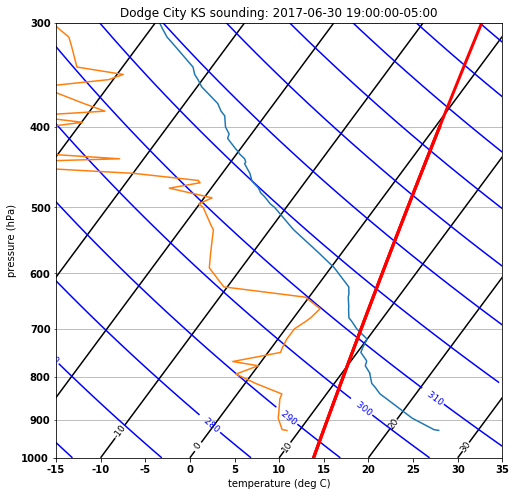

In [15]:
xcoord_rs=[]
for a_temp,a_press in zip(temps_tc,pressvals):
    out=convertTempToSkew(a_temp,a_press,skew)
    xcoord_rs.append(out)
rs_10=ax.plot(xcoord_rs,pressvals,color='r',label='rsat',linewidth=3.)
display(fig);